In [2]:
#sinple CNN for healthy rice classification

import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#batch specification
batch_size = 34
img_height = 200
img_width = 200

#loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split=0.1,
	subset = 'training',
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

#loading testing data 
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split =0.1,
	subset = 'validation', 
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

class_names = training_ds.class_names

Found 1007 files belonging to 2 classes.
Using 907 files for training.
Found 1007 files belonging to 2 classes.
Using 100 files for validation.


2022-01-22 12:44:21.706812: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-01-22 12:44:21.809527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


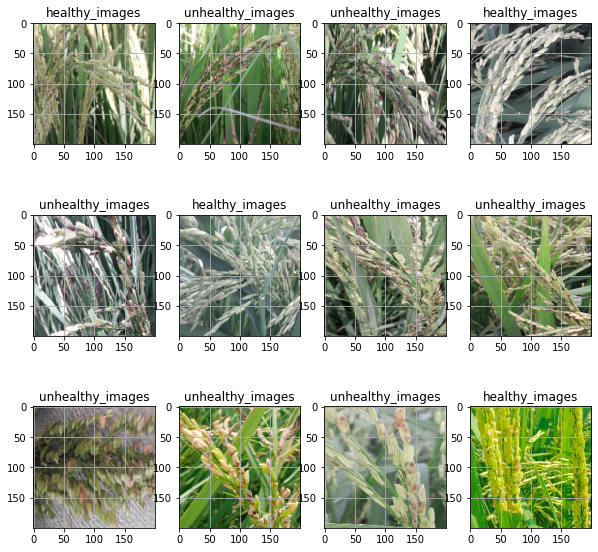

In [3]:
plt.figure(figsize=(10,10))
for images,labels in training_ds.take(1):
	for i in range(12):
		ax = plt.subplot(3,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title(class_names[labels[i]])
		plt.grid(True)

Text(0.5, 1.0, 'healthy vs Unhealthy samples in data set')

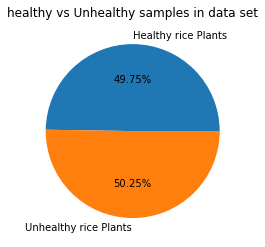

In [4]:
## healthy vs unhealthy samples in data set
healthy = os.listdir('path/rice_plant_img/healthy_images')
unhealthy = os.listdir('path/rice_plant_img/unhealthy_images')
plt.pie ([len(healthy), len(unhealthy)], labels = ['Healthy rice Plants', 
                                                                      'Unhealthy rice Plants'],autopct='%1.2f%%')
plt.title('healthy vs Unhealthy samples in data set')

In [5]:
## defining data augumentation layer
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  
  
])

In [6]:
#define CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(1, activation= 'sigmoid')
])


MyCnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
#rescheduler

def scheduler(epoch,lr):
	if epoch<5:
		return lr
	else:
		return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [8]:
#training model
retVal = MyCnn.fit(training_ds,validation_data=testing_ds,callbacks=[callback],epochs=30)

Epoch 1/100
27/27 [==============================] - 25s 805ms/step - loss: 0.7548 - accuracy: 0.5325 - val_loss: 0.6834 - val_accuracy: 0.5900
Epoch 2/100
27/27 [==============================] - 24s 805ms/step - loss: 0.6621 - accuracy: 0.5987 - val_loss: 0.7370 - val_accuracy: 0.5300
Epoch 3/100
27/27 [==============================] - 25s 816ms/step - loss: 0.6414 - accuracy: 0.6218 - val_loss: 0.6183 - val_accuracy: 0.6600
Epoch 4/100
27/27 [==============================] - 25s 815ms/step - loss: 0.5499 - accuracy: 0.7133 - val_loss: 0.5660 - val_accuracy: 0.7400
Epoch 5/100
27/27 [==============================] - 24s 802ms/step - loss: 0.4747 - accuracy: 0.7630 - val_loss: 0.5564 - val_accuracy: 0.6800
Epoch 6/100
27/27 [==============================] - 25s 807ms/step - loss: 0.3710 - accuracy: 0.8302 - val_loss: 0.5641 - val_accuracy: 0.6900
Epoch 7/100
27/27 [==============================] - 25s 816ms/step - loss: 0.2478 - accuracy: 0.9052 - val_loss: 0.6541 - val_accuracy:

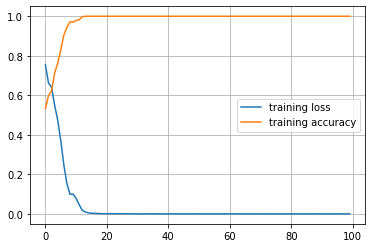

In [9]:
import matplotlib.pyplot as plt
plt.plot(retVal.history['loss'],label='training loss')
plt.plot(retVal.history['accuracy'],label='training accuracy')
plt.legend()
plt.grid(True)

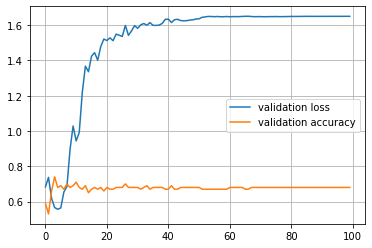

In [10]:
plt.plot(retVal.history['val_loss'],label='validation loss')
plt.plot(retVal.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.grid(True)

[[9.9999934e-01]
 [6.7640918e-01]
 [3.2665062e-05]
 [9.9993193e-01]
 [1.6249449e-07]
 [1.3371831e-08]
 [9.9549103e-01]
 [2.8516174e-14]
 [9.5447172e-10]
 [5.7765841e-04]
 [5.4190814e-02]
 [5.0835984e-06]
 [9.5981717e-01]
 [4.0041894e-01]
 [1.0000000e+00]
 [9.3577647e-01]
 [8.8019902e-01]
 [2.1857321e-03]
 [9.9552155e-01]
 [2.1306176e-05]
 [6.8228762e-10]
 [9.6279848e-01]
 [9.9700522e-01]
 [9.9998510e-01]
 [9.6028507e-06]
 [9.1686167e-14]
 [1.9559583e-01]
 [9.9998689e-01]
 [1.2162769e-05]
 [1.5263708e-05]
 [1.1909425e-02]
 [9.9829555e-01]
 [4.2367554e-01]
 [5.8848035e-01]]
[[9.9999934e-01]
 [6.7640918e-01]
 [3.2665062e-05]
 [9.9993193e-01]
 [1.6249449e-07]
 [1.3371831e-08]
 [9.9549103e-01]
 [2.8516174e-14]
 [9.5447172e-10]
 [5.7765841e-04]
 [5.4190814e-02]
 [5.0835984e-06]
 [9.5981717e-01]
 [4.0041894e-01]
 [1.0000000e+00]
 [9.3577647e-01]
 [8.8019902e-01]
 [2.1857321e-03]
 [9.9552155e-01]
 [2.1306176e-05]
 [6.8228762e-10]
 [9.6279848e-01]
 [9.9700522e-01]
 [9.9998510e-01]
 [9.6028507e-

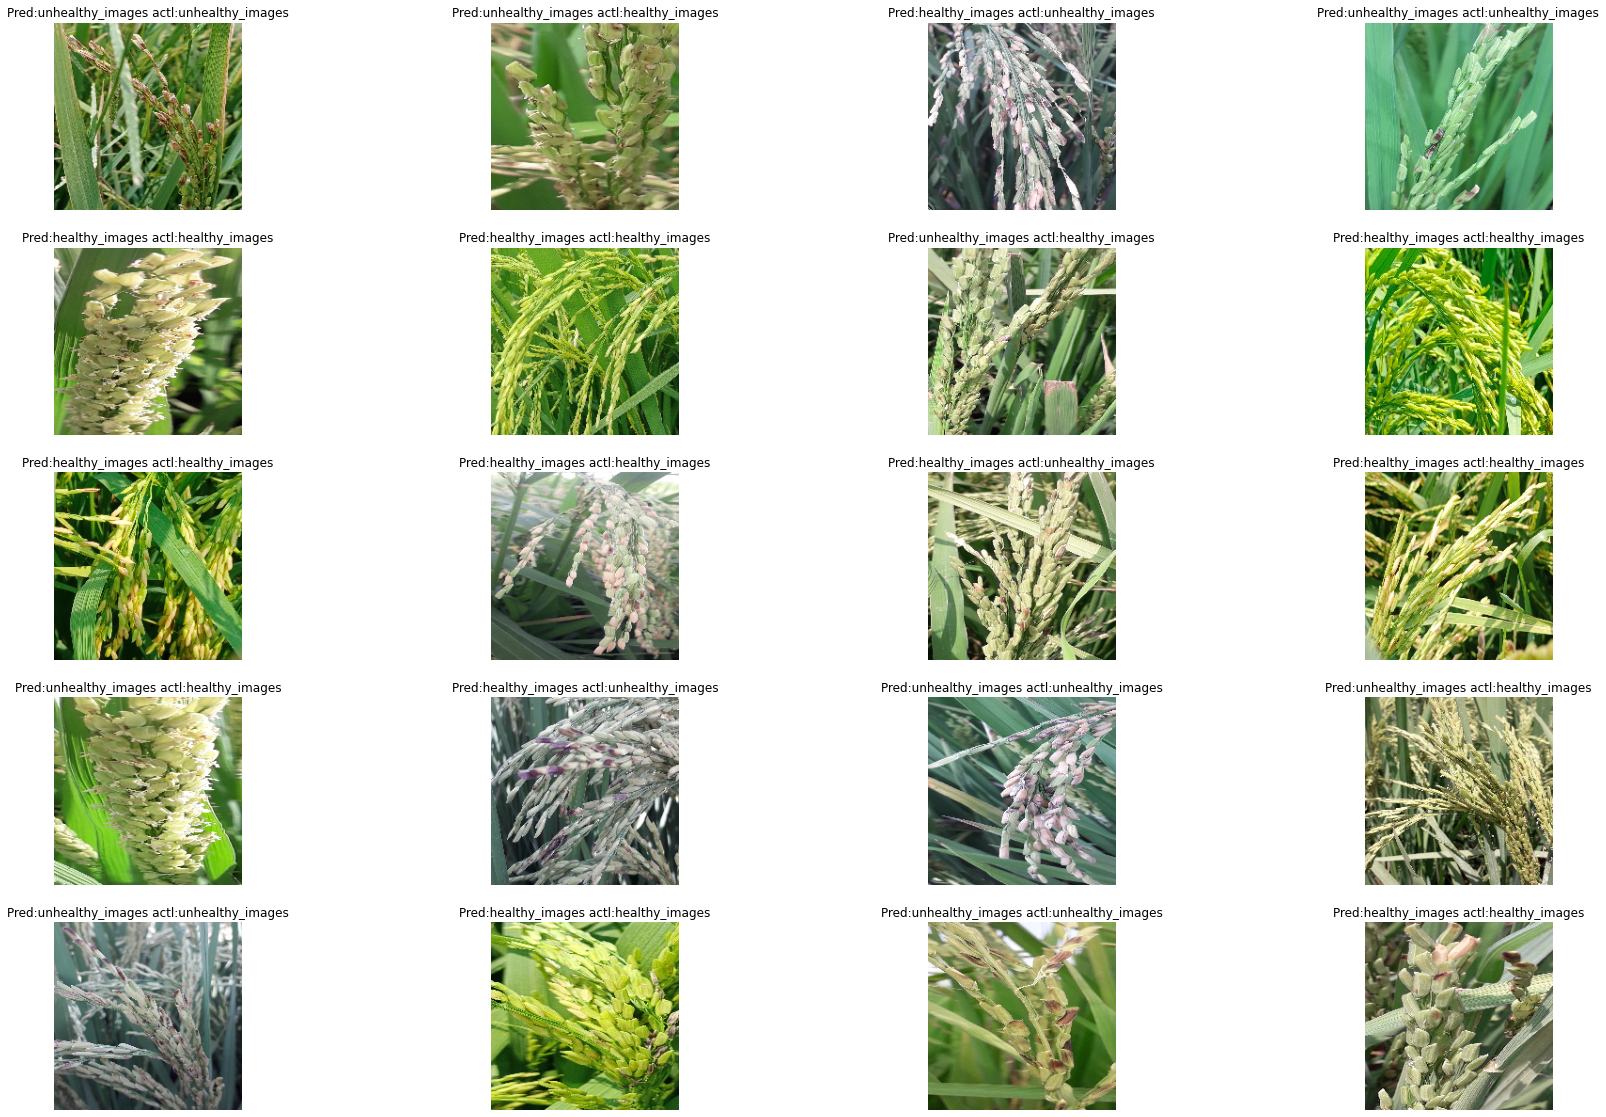

In [11]:
AccuracyVector=[]
plt.figure(figsize=(30,20))
for images,labels in testing_ds.take(1):
	predictions = MyCnn.predict(images)
	predlabel=[]
	prdlbl=[]

	for mem in predictions:
		predlabel.append(class_names[int(round(mem[0]))])
		prdlbl.append(np.argmax(mem))
		print(predictions)
	
	AccuracyVector=np.array(prdlbl)==labels

	for i in range(20):
		ax=plt.subplot(5,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title('Pred:'+predlabel[i]+' actl:'+class_names[labels[i]])
		plt.axis('off')
		plt.grid(True)



In [12]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [13]:
MyCnn.save('model1.h5')

In [14]:
from PIL import Image
imsize=(200,200)

img=Image.open('static/1.png')
img=img.convert('RGB')
img=img.resize(imsize)



img = np.asarray(img)




prd=MyCnn.predict(np.array([img]))
print(prd)
#predlabel=class_names[int(round(prd))]
prdlbl=np.argmax(prd)

print(prd)

FileNotFoundError: [Errno 2] No such file or directory: 'static/1.png'